This jupyter notebook is based out of kaggle project
https://www.kaggle.com/bandiang2/prediction-of-customer-churn-at-a-bank/notebook

Azure ML Classic was used to run various algorithms

Notes for feature engineering:
1. Imbalance in output variable -> Should solve this before running the algo
2. Data only from 3 countries..May be create variables by combining country - gender -age(buckets) proportion as demographics
3. may be combine numnber of product proportion by tenure. Tenure can be bucketed if needed.
4. can create salary brackets if needed by demographics and come up with a ratio




In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from itertools import product

from scipy.stats import chi2_contingency

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Importing the csv file
churn=pd.read_csv('/Users/plutobot/Downloads/Churn/Churn.csv')

### Basic Data Exploration

In [3]:
churn.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [4]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
churn['CustomerId'].value_counts()

15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: CustomerId, Length: 10000, dtype: int64

In [7]:
churn['CreditScore'].describe()

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: CreditScore, dtype: float64

In [8]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
churn['Geography'].value_counts(normalize='True')

France    0.501
Germany   0.251
Spain     0.248
Name: Geography, dtype: float64

In [10]:
churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
churn['Gender'].value_counts(normalize='True')

Male     0.546
Female   0.454
Name: Gender, dtype: float64

In [12]:
churn['Age'].describe()

count   10000.000
mean       38.922
std        10.488
min        18.000
25%        32.000
50%        37.000
75%        44.000
max        92.000
Name: Age, dtype: float64

In [13]:
churn['Tenure'].describe()

count   10000.000
mean        5.013
std         2.892
min         0.000
25%         3.000
50%         5.000
75%         7.000
max        10.000
Name: Tenure, dtype: float64

In [14]:
churn['Balance'].describe()

count    10000.000
mean     76485.889
std      62397.405
min          0.000
25%          0.000
50%      97198.540
75%     127644.240
max     250898.090
Name: Balance, dtype: float64

In [15]:
churn['NumOfProducts'].describe()

count   10000.000
mean        1.530
std         0.582
min         1.000
25%         1.000
50%         1.000
75%         2.000
max         4.000
Name: NumOfProducts, dtype: float64

In [16]:
churn['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [17]:
churn['NumOfProducts'].value_counts(normalize='True')

1   0.508
2   0.459
3   0.027
4   0.006
Name: NumOfProducts, dtype: float64

In [18]:
churn['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [19]:
churn['HasCrCard'].value_counts(normalize='True')

1   0.706
0   0.294
Name: HasCrCard, dtype: float64

In [20]:
churn['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [21]:
churn['IsActiveMember'].value_counts(normalize=True)

1   0.515
0   0.485
Name: IsActiveMember, dtype: float64

In [22]:
churn['EstimatedSalary'].describe()

count    10000.000
mean    100090.240
std      57510.493
min         11.580
25%      51002.110
50%     100193.915
75%     149388.247
max     199992.480
Name: EstimatedSalary, dtype: float64

In [23]:
churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
churn['Exited'].value_counts(normalize='True')

0   0.796
1   0.204
Name: Exited, dtype: float64

In [25]:
churn.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [26]:
churn1=churn.copy()

In [27]:
churn=churn.drop(columns=['RowNumber','Surname'])

In [28]:
churn.count()

CustomerId         10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [29]:
churn.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
# converting geography into label encoding
churn['geo']=churn['Geography'].astype(object).astype('category')
churn['geo']=churn['geo'].cat.codes
churn['geo']=churn['geo'].replace(0,3)

In [31]:
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1,3
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,2
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,3
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0,3
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,2


In [32]:
# converting geography into label encoding
churn['gender']=churn['Gender'].astype(object).astype('category')
churn['gender']=churn['gender'].cat.codes
churn['gender']=churn['gender'].replace(0,2)

In [33]:
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo,gender
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1,3,2
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,2,2
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,3,2
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0,3,2
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,2,2


In [34]:
churn['Age'].describe()

count   10000.000
mean       38.922
std        10.488
min        18.000
25%        32.000
50%        37.000
75%        44.000
max        92.000
Name: Age, dtype: float64

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

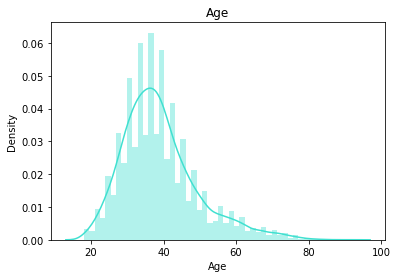

In [35]:
sns.distplot(churn['Age'],color='Turquoise').set_title('Age')

In [36]:
# AGE BUCKETS
def func(x):
        if 0 < x <= 30:
            return '1. <=30'
        elif 30 < x <= 40:
            return '2. 31-40'
        elif 40 < x <= 50:
            return '3. 41-50'
        elif 50 < x <= 60:
            return '4. 51-60'    
        elif x > 60:
            return '5. > 70'   
        return 'NOVALUE'

In [37]:
churn['AgeBucket'] = churn['Age'].apply(func)

In [38]:
#Count of buckets
churn['AgeBucket'].value_counts()

2. 31-40    4451
3. 41-50    2320
1. <=30     1968
4. 51-60     797
5. > 70      464
Name: AgeBucket, dtype: int64

In [39]:
#Ratio of buckets
churn['AgeBucket'].value_counts(normalize=True)

2. 31-40   0.445
3. 41-50   0.232
1. <=30    0.197
4. 51-60   0.080
5. > 70    0.046
Name: AgeBucket, dtype: float64

In [40]:
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo,gender,AgeBucket
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1,3,2,3. 41-50
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,2,2,3. 41-50
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,3,2,3. 41-50
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0,3,2,2. 31-40
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,2,2,3. 41-50


In [41]:
# converting age buckets into label encoding
churn['agebuckets']=churn['AgeBucket'].astype(object).astype('category')
churn['agebuckets']=churn['agebuckets'].cat.codes
churn['agebuckets']=churn['agebuckets'].replace(0,5)

In [42]:
churn['demokey']=churn['Geography'].astype(str)+churn['Gender'].astype(str)+churn['AgeBucket'].astype(str)

In [43]:
churn['demokey'].value_counts()

FranceMale2. 31-40       1293
FranceFemale2. 31-40     1018
SpainMale2. 31-40         650
FranceMale1. <=30         576
FranceMale3. 41-50        568
GermanyMale2. 31-40       549
FranceFemale3. 41-50      499
GermanyFemale2. 31-40     473
SpainFemale2. 31-40       468
FranceFemale1. <=30       462
GermanyMale3. 41-50       348
GermanyFemale3. 41-50     330
SpainMale3. 41-50         304
SpainFemale3. 41-50       271
SpainMale1. <=30          267
GermanyMale1. <=30        245
SpainFemale1. <=30        210
GermanyFemale1. <=30      208
FranceMale4. 51-60        196
FranceFemale4. 51-60      171
GermanyFemale4. 51-60     129
FranceMale5. > 70         120
GermanyMale4. 51-60       114
FranceFemale5. > 70       111
SpainMale4. 51-60          96
SpainFemale4. 51-60        91
SpainMale5. > 70           71
GermanyMale5. > 70         60
GermanyFemale5. > 70       53
SpainFemale5. > 70         49
Name: demokey, dtype: int64

In [44]:
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo,gender,AgeBucket,agebuckets,demokey
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1,3,2,3. 41-50,2,FranceFemale3. 41-50
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,2,2,3. 41-50,2,SpainFemale3. 41-50
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,3,2,3. 41-50,2,FranceFemale3. 41-50
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0,3,2,2. 31-40,1,FranceFemale2. 31-40
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,2,2,3. 41-50,2,SpainFemale3. 41-50


In [45]:
# Combining country, gender and age
churn['demographics']=churn['gender']*churn['geo']*churn['agebuckets']

In [46]:
churn['demographics'].describe()

count   10000.000
mean        7.587
std         6.968
min         1.000
25%         3.000
50%         6.000
75%        10.000
max        30.000
Name: demographics, dtype: float64

In [47]:
churn['EstimatedSalary'].describe()

count    10000.000
mean    100090.240
std      57510.493
min         11.580
25%      51002.110
50%     100193.915
75%     149388.247
max     199992.480
Name: EstimatedSalary, dtype: float64

In [48]:
churn.count()

CustomerId         10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
geo                10000
gender             10000
AgeBucket          10000
agebuckets         10000
demokey            10000
demographics       10000
dtype: int64

In [49]:
# salary ratio by demographics

# group by demokey
demsal=pd.DataFrame(churn.groupby(['demokey'])['EstimatedSalary'].mean().reset_index())

In [50]:
demsal=demsal.rename(columns={'EstimatedSalary':'GroupSalary'})

In [51]:
demsal

,demokey,GroupSalary
0,FranceFemale1. <=30,103393.643
1,FranceFemale2. 31-40,97890.795
2,FranceFemale3. 41-50,102813.131
3,FranceFemale4. 51-60,92905.637
4,FranceFemale5. > 70,94625.829
5,FranceMale1. <=30,103030.879
6,FranceMale2. 31-40,99418.429
7,FranceMale3. 41-50,100351.006
8,FranceMale4. 51-60,99207.875
9,FranceMale5. > 70,95348.226


In [52]:
churn=pd.merge(churn,demsal,on='demokey',how='left')

In [53]:
churn['SalaryRatioByDemo']=churn['GroupSalary']/churn['EstimatedSalary']

In [54]:
churn['SalaryRatioByDemo'].describe()

count   10000.000
mean        5.087
std        92.010
min         0.467
25%         0.671
50%         0.999
75%         1.967
max      8733.367
Name: SalaryRatioByDemo, dtype: float64

In [55]:
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo,gender,AgeBucket,agebuckets,demokey,demographics,GroupSalary,SalaryRatioByDemo
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1,3,2,3. 41-50,2,FranceFemale3. 41-50,12,102813.131,1.014
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,2,2,3. 41-50,2,SpainFemale3. 41-50,8,104621.690,0.930
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,3,2,3. 41-50,2,FranceFemale3. 41-50,12,102813.131,0.902
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0,3,2,2. 31-40,1,FranceFemale2. 31-40,6,97890.795,1.043
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,2,2,3. 41-50,2,SpainFemale3. 41-50,8,104621.690,1.323


In [56]:
churn.dtypes

CustomerId             int64
CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
geo                     int8
gender                  int8
AgeBucket             object
agebuckets              int8
demokey               object
demographics            int8
GroupSalary          float64
SalaryRatioByDemo    float64
dtype: object

In [57]:
new=churn.drop(columns=['geo','gender','AgeBucket','demokey','GroupSalary','agebuckets'])

In [58]:
new.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,demographics,SalaryRatioByDemo
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1,12,1.014
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,8,0.930
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,12,0.902
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0,6,1.043
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,8,1.323


In [59]:
newnum=new[['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','demographics','SalaryRatioByDemo','Exited']]

In [60]:
newnum.count()

CustomerId           10000
CreditScore          10000
Age                  10000
Tenure               10000
Balance              10000
NumOfProducts        10000
HasCrCard            10000
IsActiveMember       10000
EstimatedSalary      10000
demographics         10000
SalaryRatioByDemo    10000
Exited               10000
dtype: int64

In [61]:
newnum.dtypes

CustomerId             int64
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
demographics            int8
SalaryRatioByDemo    float64
Exited                 int64
dtype: object

In [62]:
newnum.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,demographics,SalaryRatioByDemo,Exited
0,15634602,619,42,2,0.000,1,1,1,101348.880,12,1.014,1
1,15647311,608,41,1,83807.860,1,0,1,112542.580,8,0.930,0
2,15619304,502,42,8,159660.800,3,1,0,113931.570,12,0.902,1
3,15701354,699,39,1,0.000,2,0,0,93826.630,6,1.043,0
4,15737888,850,43,2,125510.820,1,1,1,79084.100,8,1.323,0


In [63]:
newnum['Balance']=newnum['Balance'].replace(0,0.001)
newnum['Tenure']=newnum['Tenure'].replace(0,0.001)

<ipython-input-63-32ccacd192a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newnum['Balance']=newnum['Balance'].replace(0,0.001)
<ipython-input-63-32ccacd192a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newnum['Tenure']=newnum['Tenure'].replace(0,0.001)


In [64]:
newnum.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,demographics,SalaryRatioByDemo,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,15690940.569,650.529,38.922,5.013,76485.890,1.530,0.706,0.515,100090.240,7.587,5.087,0.204
std,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,6.968,92.010,0.403
min,15565701.000,350.000,18.000,0.001,0.001,1.000,0.000,0.000,11.580,1.000,0.467,0.000
25%,15628528.250,584.000,32.000,3.000,0.001,1.000,0.000,0.000,51002.110,3.000,0.671,0.000
50%,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,6.000,0.999,0.000
75%,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,10.000,1.967,0.000
max,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,30.000,8733.367,1.000


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CreditScore')

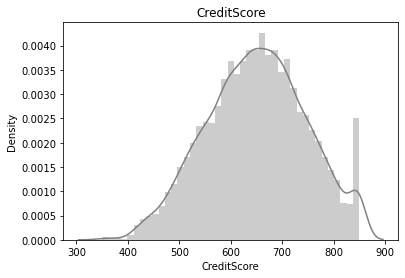

In [65]:
# Examining the data for any outliers or any other observations
sns.distplot(newnum['CreditScore'],color='Grey').set_title('CreditScore')


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

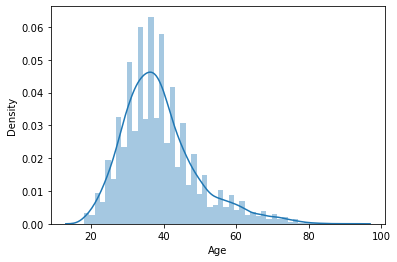

In [66]:
sns.distplot(newnum['Age'])

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

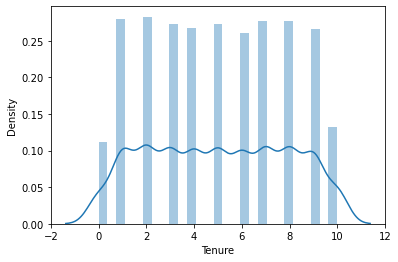

In [67]:
sns.distplot(newnum['Tenure'])

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tenure')

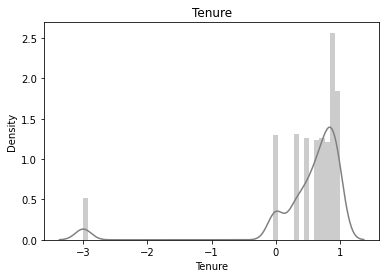

In [68]:
sns.distplot(np.log10(newnum['Tenure']),color='grey').set_title('Tenure')


/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

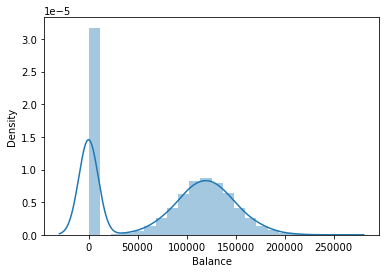

In [69]:
sns.distplot(newnum['Balance'])

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance')

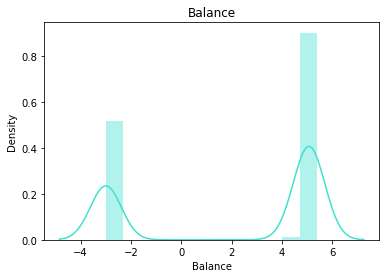

In [70]:
sns.distplot(np.log10(newnum['Balance']),color='Turquoise').set_title('Balance')

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'NumOfProducts')

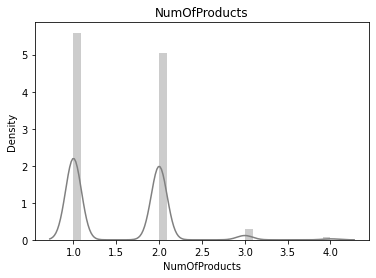

In [71]:
sns.distplot((newnum['NumOfProducts']),color='Grey').set_title('NumOfProducts')

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

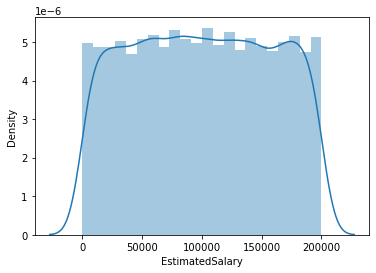

In [72]:
sns.distplot(newnum['EstimatedSalary'])

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'EstimatedSalary')

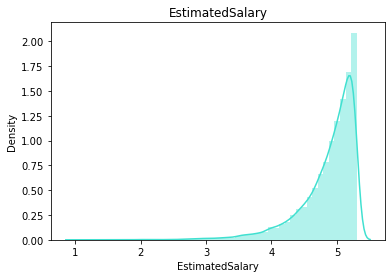

In [73]:
sns.distplot(np.log10(newnum['EstimatedSalary']),color='Turquoise').set_title('EstimatedSalary')

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'demographics')

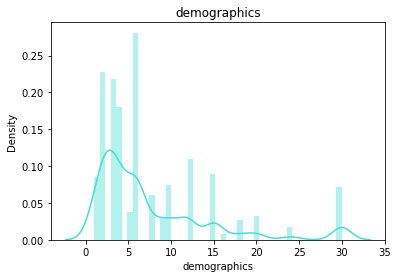

In [74]:
sns.distplot((newnum['demographics']),color='turquoise').set_title('demographics')

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demographics', ylabel='Density'>

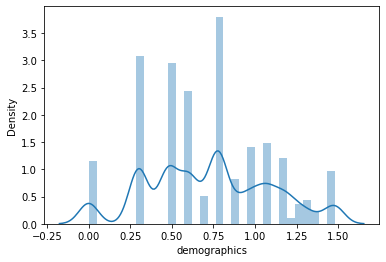

In [75]:
sns.distplot(np.log10(newnum['demographics']))

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalaryRatioByDemo', ylabel='Density'>

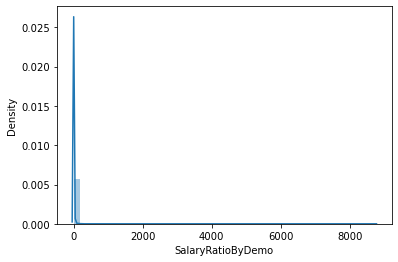

In [76]:
sns.distplot(newnum['SalaryRatioByDemo'])

/Users/plutobot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalaryRatioByDemo')

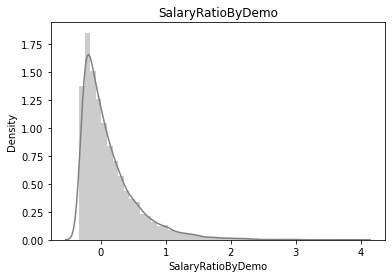

In [77]:
sns.distplot(np.log10(newnum['SalaryRatioByDemo']),color='grey').set_title('SalaryRatioByDemo')

In [78]:
# Transforming certain variables
newnum['Tenurelog']=np.log10(newnum['Tenure'])
newnum['Balancelog']=np.log10(newnum['Balance'])
newnum['EstimatedSalarylog']=np.log10(newnum['EstimatedSalary'])
newnum['SalaryRatioByDemolog']=np.log10(newnum['SalaryRatioByDemo'])

<ipython-input-78-d35afb65dcd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newnum['Tenurelog']=np.log10(newnum['Tenure'])


In [79]:
newnum.count()

CustomerId              10000
CreditScore             10000
Age                     10000
Tenure                  10000
Balance                 10000
NumOfProducts           10000
HasCrCard               10000
IsActiveMember          10000
EstimatedSalary         10000
demographics            10000
SalaryRatioByDemo       10000
Exited                  10000
Tenurelog               10000
Balancelog              10000
EstimatedSalarylog      10000
SalaryRatioByDemolog    10000
dtype: int64

In [80]:
#newnum.to_csv('/Users/plutobot/Downloads/Churn/ChurntrainA.csv')

In [81]:
newnum=newnum[['CustomerId','CreditScore','Age','Tenurelog','Balancelog','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalarylog','demographics','SalaryRatioByDemolog','Exited']]

In [82]:
newnum.count()

CustomerId              10000
CreditScore             10000
Age                     10000
Tenurelog               10000
Balancelog              10000
NumOfProducts           10000
HasCrCard               10000
IsActiveMember          10000
EstimatedSalarylog      10000
demographics            10000
SalaryRatioByDemolog    10000
Exited                  10000
dtype: int64

In [83]:
newnum['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [84]:
newnum.to_csv('/Users/plutobot/Downloads/Churn/Churntrain.csv')

### Visuals for ppt

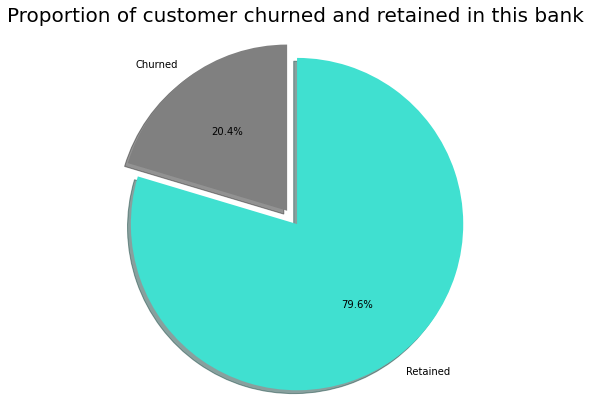

In [85]:
# Pie chart to show the distribution of output variable
labels = 'Churned', 'Retained'
sizes = [newnum.Exited[newnum['Exited']==1].count(), newnum.Exited[newnum['Exited']==0].count()]
explode = (0, 0.1)
colors=['Gray','Turquoise']
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained in this bank", size = 20)
plt.show()



In [86]:
churn.dtypes

CustomerId             int64
CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
geo                     int8
gender                  int8
AgeBucket             object
agebuckets              int8
demokey               object
demographics            int8
GroupSalary          float64
SalaryRatioByDemo    float64
dtype: object

In [87]:
churn.to_csv("/Users/plutobot/Downloads/Churn/ChurntrainB.csv")

In [99]:

pd.DataFrame(churn.groupby(['Geography'])['Exited'].value_counts(normalize=True))*100

Exited
Geography Exited        
France    0       83.845
          1       16.155
Germany   0       67.557
          1       32.443
Spain     0       83.327
          1       16.673

In [107]:

pd.DataFrame(churn.groupby(['NumOfProducts'])['Exited'].value_counts(normalize=True))*100

Exited
NumOfProducts Exited        
1             0       72.286
              1       27.714
2             0       92.418
              1        7.582
3             1       82.707
              0       17.293
4             1      100.000

Text(0.5, 0.98, 'Customer Behavior by Geography')

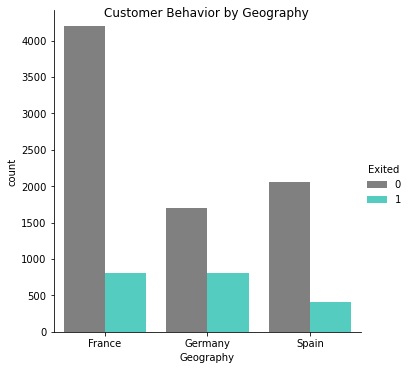

In [88]:
# Geography vs Exited
class_order = ['France','Germany','Spain'] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='Geography', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by Geography')

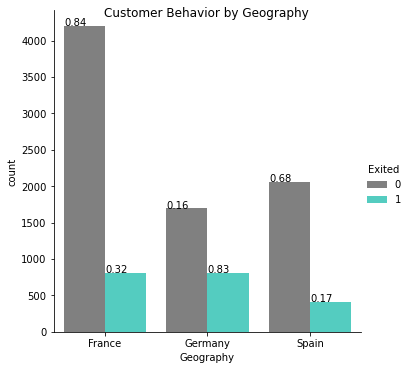

In [87]:
# Geography vs Exited
class_order = ['France','Germany','Spain'] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='Geography', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by Geography')



spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    geo_total = len(churn[churn['Geography']==spot[1][0]])
    geo_Exited_total = len(churn[(churn['Geography']==spot[1][0]) & 
        (churn['Exited']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(geo_Exited_total/geo_total))

In [100]:
pd.DataFrame(churn.groupby(['Gender'])['Exited'].value_counts(normalize=True))*100

Exited
Gender Exited        
Female 0       74.928
       1       25.072
Male   0       83.544
       1       16.456

Text(0.5, 0.98, 'Customer Behavior by Gender')

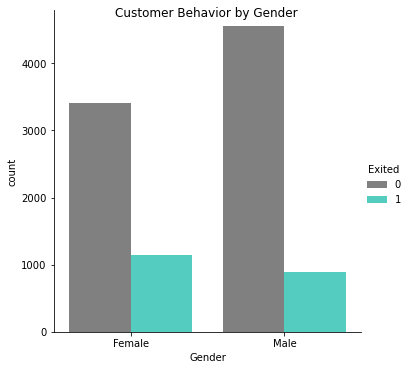

In [90]:
# Gender vs Exited
class_order = ['Female','Male'] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='Gender', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by Gender')

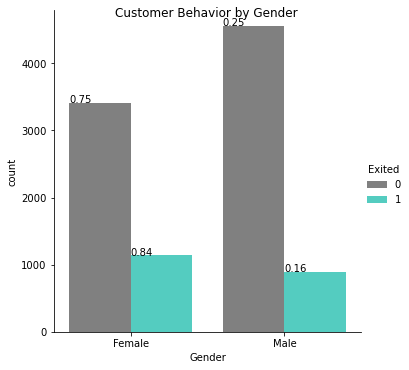

In [88]:
# Gender vs Exited
class_order = ['Female','Male'] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='Gender', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by Gender')



spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    gender_total = len(churn[churn['Gender']==spot[1][0]])
    gender_Exited_total = len(churn[(churn['Gender']==spot[1][0]) & 
        (churn['Exited']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(gender_Exited_total/gender_total))

In [102]:
pd.DataFrame(churn.groupby(['HasCrCard'])['Exited'].value_counts(normalize=True))*100

Exited
HasCrCard Exited        
0         0       79.185
          1       20.815
1         0       79.816
          1       20.184

Text(0.5, 0.98, 'Customer Behavior by HasCrCard')

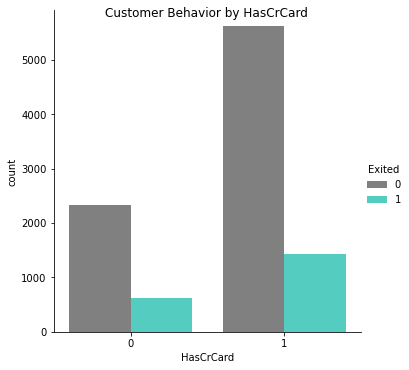

In [91]:
# HasCrCard vs Exited
class_order = [0,1] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='HasCrCard', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by HasCrCard')

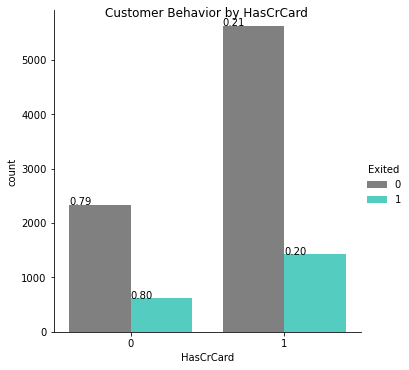

In [89]:
# HasCrCard vs Exited
class_order = [0,1] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='HasCrCard', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by HasCrCard')



spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    crcard_total = len(churn[churn['HasCrCard']==spot[1][0]])
    crcard_Exited_total = len(churn[(churn['HasCrCard']==spot[1][0]) & 
        (churn['Exited']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(crcard_Exited_total/crcard_total))

In [103]:
pd.DataFrame(churn.groupby(['IsActiveMember'])['Exited'].value_counts(normalize=True))*100

Exited
IsActiveMember Exited        
0              0       73.149
               1       26.851
1              0       85.731
               1       14.269

Text(0.5, 0.98, 'Customer Behavior by IsActiveMember')

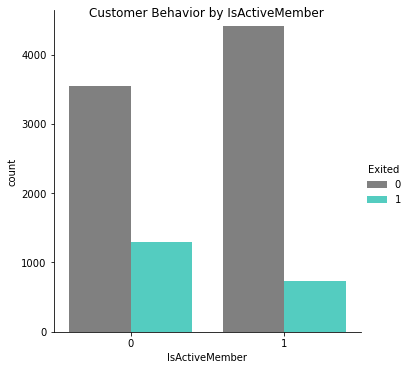

In [92]:
# IsActiveMembervs Exited
class_order = [0,1] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='IsActiveMember', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by IsActiveMember')


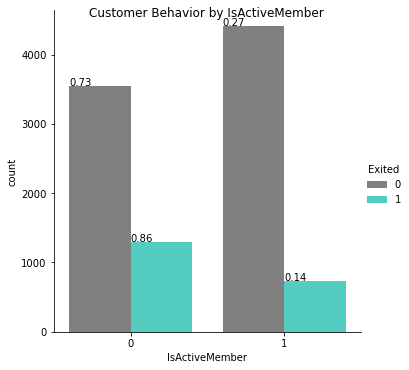

In [90]:
# IsActiveMember vs Exited
class_order = [0,1] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='IsActiveMember', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by IsActiveMember')



spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    crcard_total = len(churn[churn['IsActiveMember']==spot[1][0]])
    crcard_Exited_total = len(churn[(churn['IsActiveMember']==spot[1][0]) & 
        (churn['Exited']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(crcard_Exited_total/crcard_total))

In [91]:
churn.dtypes

CustomerId             int64
CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
geo                     int8
gender                  int8
AgeBucket             object
agebuckets              int8
demokey               object
demographics            int8
GroupSalary          float64
SalaryRatioByDemo    float64
dtype: object

In [92]:
churn['AgeBucket'].value_counts()

2. 31-40    4451
3. 41-50    2320
1. <=30     1968
4. 51-60     797
5. > 70      464
Name: AgeBucket, dtype: int64

In [105]:
pd.DataFrame(churn.groupby(['AgeBucket'])['Exited'].value_counts(normalize=True))*100

Exited
AgeBucket Exited        
1. <=30   0       92.480
          1        7.520
2. 31-40  0       87.913
          1       12.087
3. 41-50  0       66.034
          1       33.966
4. 51-60  1       56.211
          0       43.789
5. > 70   0       75.216
          1       24.784

Text(0.5, 0.98, 'Customer Behavior by AgeBucket')

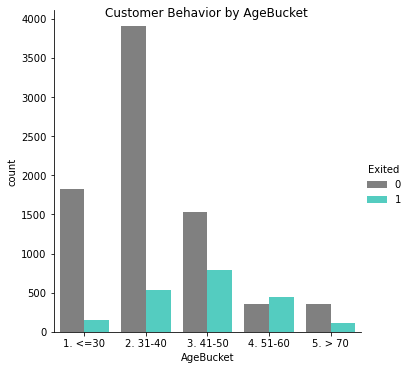

In [93]:
# AgeBucketvs Exited
class_order = ["1. <=30","2. 31-40","3. 41-50","4. 51-60","5. > 70"] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='AgeBucket', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by AgeBucket')


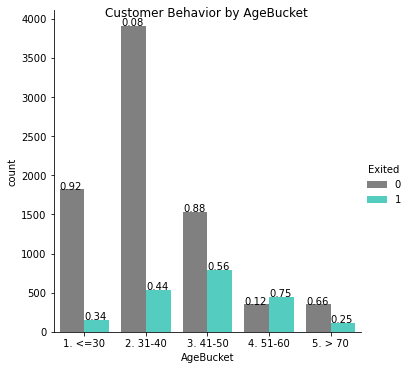

In [93]:
# AgeBucketvs Exited
class_order = ["1. <=30","2. 31-40","3. 41-50","4. 51-60","5. > 70"] 
hue_order = [0, 1]
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=churn, kind='count', 
                   x='AgeBucket', hue='Exited',
                   order = class_order, 
                   hue_order = hue_order ,palette=colors)
catp.fig.suptitle('Customer Behavior by AgeBucket')



spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    crcard_total = len(churn[churn['AgeBucket']==spot[1][0]])
    crcard_Exited_total = len(churn[(churn['AgeBucket']==spot[1][0]) & 
        (churn['Exited']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(crcard_Exited_total/crcard_total))

In [94]:
newnum.count()

CustomerId              10000
CreditScore             10000
Age                     10000
Tenurelog               10000
Balancelog              10000
NumOfProducts           10000
HasCrCard               10000
IsActiveMember          10000
EstimatedSalarylog      10000
demographics            10000
SalaryRatioByDemolog    10000
Exited                  10000
dtype: int64

In [96]:
churn.dtypes

CustomerId             int64
CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
geo                     int8
gender                  int8
AgeBucket             object
agebuckets              int8
demokey               object
demographics            int8
GroupSalary          float64
SalaryRatioByDemo    float64
dtype: object

In [73]:
newnum.dtypes

CustomerId             int64
CreditScore            int64
Age                    int64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
demographics            int8
SalaryRatioByDemo    float64
Exited                 int64
dtype: object

In [109]:
xA=['Age','NumOfProducts','Balancelog','CreditScore','SalaryRatioByDemolog','IsActiveMember','demographics','Tenurelog','HasCrCard']
yA=[0.1321,0.0666,0.0603,0.0589,0.0494,0.0451,0.0353,0.03,0.00026]
colorA=['Turquoise','LightBlue','Grey','Orange','LightGreen','Pink','Violet','Yellow','Green']

Text(0.5, 1.0, 'Permutation Feature Importance')

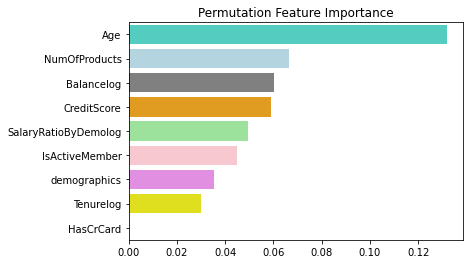

In [110]:
sns.barplot(x=yA,y=xA,palette=colorA).set_title('Permutation Feature Importance')

In [113]:
# Balance BUCKETS
def func(x):
        if -1 < x <= 100000:
            return '1. <=100K'
        elif 100000 < x <= 125000:
            return '2. 100K-125K'    
        elif x > 125000:
            return '3. > 125K'   
        return 'NOVALUE'

In [114]:
churn['Balance'].describe()

count    10000.000
mean     76485.889
std      62397.405
min          0.000
25%          0.000
50%      97198.540
75%     127644.240
max     250898.090
Name: Balance, dtype: float64

In [115]:
churn['balancebucket'] = churn['Balance'].apply(func)

In [116]:
churn['balancebucket'].value_counts()

1. <=100K       5201
3. > 125K       2731
2. 100K-125K    2068
Name: balancebucket, dtype: int64

In [117]:
churn['balancebucket'].value_counts(normalize=True)

1. <=100K      0.520
3. > 125K      0.273
2. 100K-125K   0.207
Name: balancebucket, dtype: float64

In [118]:
pd.DataFrame(churn.groupby(['balancebucket'])['Exited'].value_counts(normalize=True))*100

Exited
balancebucket Exited        
1. <=100K     0       84.118
              1       15.882
2. 100K-125K  0       73.017
              1       26.983
3. > 125K     0       76.089
              1       23.911

In [121]:
# Balance BUCKETS
def funcc(x):
        if 0 < x <= 590:
            return '1. <=590'
        elif 590 < x <= 655:
            return '2. 590-655'
        elif 655 < x <= 720:
            return '3. 655-720'   
        elif x > 720:
            return '3. > 720'   
        return 'NOVALUE'

In [120]:
churn['CreditScore'].describe()

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: CreditScore, dtype: float64

In [122]:
churn['creditscorebucket'] = churn['CreditScore'].apply(funcc)

In [124]:
churn['creditscorebucket'].value_counts()

1. <=590      2727
3. 655-720    2436
2. 590-655    2429
3. > 720      2408
Name: creditscorebucket, dtype: int64

In [125]:
churn['creditscorebucket'].value_counts(normalize=True)

1. <=590     0.273
3. 655-720   0.244
2. 590-655   0.243
3. > 720     0.241
Name: creditscorebucket, dtype: float64

In [126]:
pd.DataFrame(churn.groupby(['creditscorebucket'])['Exited'].value_counts(normalize=True))*100

Exited
creditscorebucket Exited        
1. <=590          0       78.181
                  1       21.819
2. 590-655        0       79.086
                  1       20.914
3. 655-720        0       81.609
                  1       18.391
3. > 720          0       79.817
                  1       20.183

In [127]:
churn['Tenure'].describe()

count   10000.000
mean        5.013
std         2.892
min         0.000
25%         3.000
50%         5.000
75%         7.000
max        10.000
Name: Tenure, dtype: float64

In [128]:
# Tenure BUCKETS
def func(x):
        if -1 < x <= 1:
            return '1. <=1'
        elif 1 < x <= 3:
            return '2. 1-3'
        elif 3 < x <= 5:
            return '3. 3-5'
        elif 5 < x <= 7:
            return '4. 5-7'    
        elif 7 < x <= 10:
            return '5. 7-10'  
        return 'NOVALUE'

In [129]:
churn['Tenurebucket'] = churn['Tenure'].apply(func)

In [130]:
churn['Tenurebucket'].value_counts()

5. 7-10    2499
2. 1-3     2057
3. 3-5     2001
4. 5-7     1995
1. <=1     1448
Name: Tenurebucket, dtype: int64

In [131]:
pd.DataFrame(churn.groupby(['Tenurebucket'])['Exited'].value_counts(normalize=True))*100

Exited
Tenurebucket Exited        
1. <=1       0       77.417
             1       22.583
2. 1-3       0       79.874
             1       20.126
3. 3-5       0       79.410
             1       20.590
4. 5-7       0       81.303
             1       18.697
5. 7-10      0       79.552
             1       20.448

In [132]:
churn['EstimatedSalary'].describe()

count    10000.000
mean    100090.240
std      57510.493
min         11.580
25%      51002.110
50%     100193.915
75%     149388.247
max     199992.480
Name: EstimatedSalary, dtype: float64

In [133]:
# Salary BUCKETS
def func(x):
        if 0 < x <= 50000:
            return '1. <=50000'
        elif 50000 < x <= 100000:
            return '2. 50k-100k'
        elif 100000 < x <= 150000:
            return '3. 100k-150k'
        elif 150000 < x <= 200000:
            return '4. 150k-200k'     
        return 'NOVALUE'

In [134]:
churn['Salarybucket'] = churn['EstimatedSalary'].apply(func)

In [135]:
churn['Salarybucket'].value_counts()

3. 100k-150k    2555
2. 50k-100k     2537
4. 150k-200k    2455
1. <=50000      2453
Name: Salarybucket, dtype: int64

In [136]:
pd.DataFrame(churn.groupby(['Salarybucket'])['Exited'].value_counts(normalize=True))*100

Exited
Salarybucket Exited        
1. <=50000   0       80.065
             1       19.935
2. 50k-100k  0       80.134
             1       19.866
3. 100k-150k 0       79.765
             1       20.235
4. 150k-200k 0       78.534
             1       21.466